In [ ]:
!pip install pandas openpyxl

In [6]:
import os

In [ ]:
os.getcwd()

In [2]:
import pandas as pd
# Specify the file path
file_path = "Bird_Monitoring_Data_FOREST.XLSX"

# Read the Excel file with multiple sheets
excel_data = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Read data from all sheets into a dictionary
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [3]:
# Example: Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
combined_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

In [4]:
# later u can Drop the 'Sheet' column
combined_df = combined_df.drop(columns=['Sheet'])

In [ ]:
combined_df

In [ ]:
combined_df.count()

In [7]:
combined_df.drop(columns=['Sub_Unit_Code'], inplace=True)

EDA

In [8]:
combined_df.shape

(8546, 28)

In [ ]:
combined_df.info()


In [ ]:
combined_df.isnull().sum()

In [11]:
combined_df.drop(columns=['Sex'], inplace=True)

In [ ]:
combined_df.head()

In [13]:
missing_id_method_rows = combined_df[combined_df['ID_Method'].isna()]

In [14]:
missing_id_method_rows

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
5853,PRWI,PRWI 1,PRWI-0051,Forest,2018,2018-06-06,06:16:00,06:26:00,Kimberly Serno,1,...,93587,REVI,False,False,18.9,69.800003,Partly Cloudy,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False


In [15]:
pd.set_option('display.max_columns', None)

In [16]:
filtered_df = combined_df[combined_df['Common_Name'] == "Red-eyed Vireo"]

In [ ]:
filtered_df

In [ ]:
combined_df["ID_Method"].fillna("Singing",inplace=True)

In [ ]:
combined_df.count()

In [20]:
missing_id_method_rows = combined_df[combined_df['ID_Method'].isna()]

In [ ]:
missing_id_method_rows 

In [22]:
missing_id= combined_df[combined_df['AcceptedTSN'].isna()]

In [ ]:
missing_id

In [24]:
filter = combined_df[combined_df['NPSTaxonCode'] == 926917]

In [ ]:
filter

In [ ]:
combined_df["AcceptedTSN"].fillna("NULL",inplace=True)

In [ ]:
combined_df.count()

In [ ]:
mode_value = combined_df['Distance'].mode()[0]
combined_df['Distance'].fillna(mode_value, inplace=True)


In [ ]:
combined_df.head(5)

In [43]:
combined_df["Temperature"]=combined_df["Temperature"].round(0).astype(int)

In [45]:
combined_df.head(5)

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,False,True,20,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,False,False,20,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,False,False,20,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,False,False,20,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,False,False,20,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [46]:
combined_df["Humidity"]=combined_df["Humidity"].round(0).astype(int)

In [48]:
combined_df.head(5)

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,ID_Method,Distance,Flyover_Observed,Common_Name,Scientific_Name,AcceptedTSN,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Singing,<= 50 Meters,False,Eastern Towhee,Pipilo erythrophthalmus,179276.0,83803,EATO,False,True,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,0-2.5 min,Calling,<= 50 Meters,False,White-breasted Nuthatch,Sitta carolinensis,178775.0,90935,WBNU,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Calling,50 - 100 Meters,False,Red-bellied Woodpecker,Melanerpes carolinus,178195.0,84865,RBWO,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Singing,<= 50 Meters,False,Orchard Oriole,Icterus spurius,179064.0,93634,OROR,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,2.5 - 5 min,Visualization,<= 50 Meters,False,Northern Mockingbird,Mimus polyglottos,178620.0,88394,NOMO,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [50]:
combined_df.to_csv("forestbirds.csv",index=False)

UNI VARIENT ANALYSIS

In [29]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

<Axes: xlabel='ID_Method', ylabel='count'>

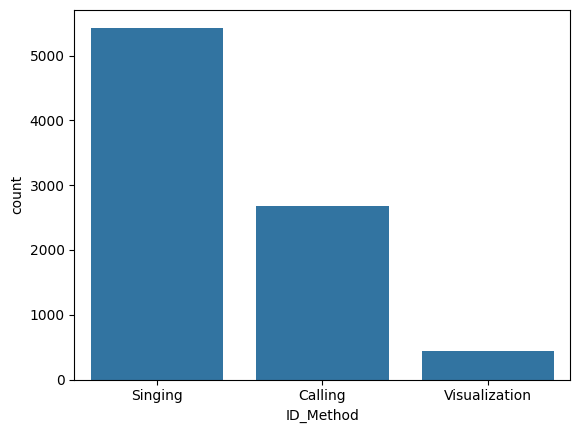

In [31]:
sns.countplot(x="ID_Method",data=combined_df) 

In [ ]:
#Common_Name
sns.countplot(x="Common_Name",data=combined_df) 

In [33]:
combined_df["Common_Name"].nunique()

108

<Axes: xlabel='Observer', ylabel='count'>

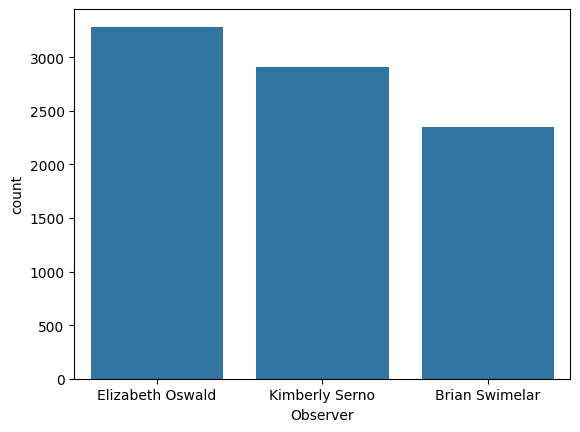

In [34]:
#Observer
sns.countplot(x="Observer",data=combined_df) 

<Axes: xlabel='PIF_Watchlist_Status', ylabel='count'>

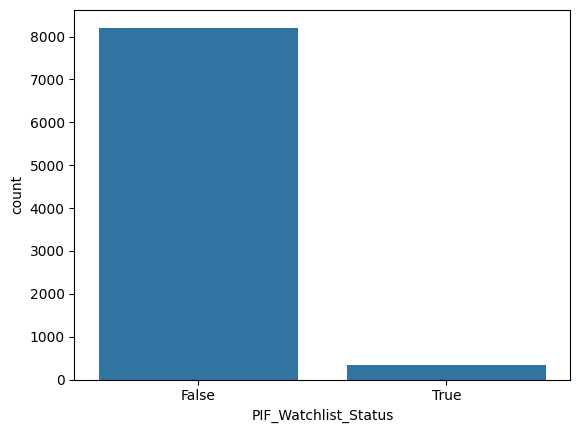

In [35]:
#	PIF_Watchlist_Status
sns.countplot(x="PIF_Watchlist_Status",data=combined_df) 

BI - ANALYSIS

In [36]:
site_count=combined_df["Site_Name"].value_counts()

In [ ]:
site_count

In [38]:
unique_sites = combined_df.groupby("Admin_Unit_Code")["Site_Name"].nunique()

In [ ]:
unique_sites

<Axes: xlabel='Admin_Unit_Code', ylabel='Site_Name'>

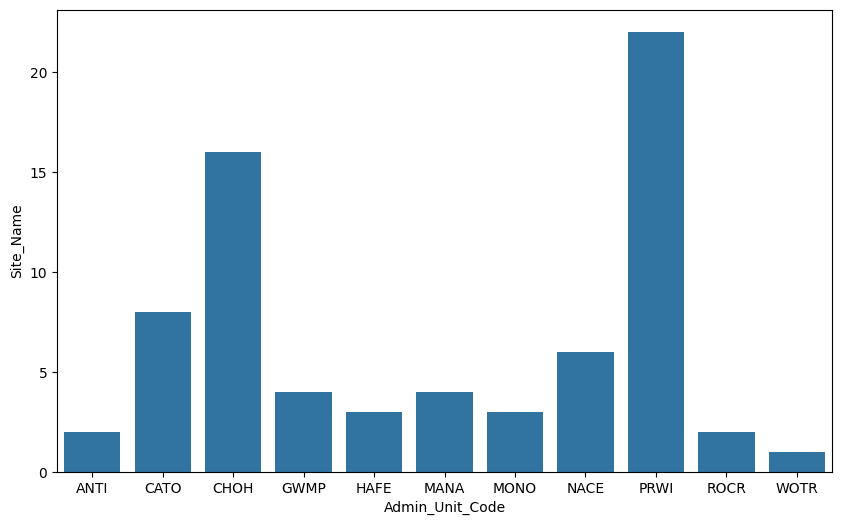

In [40]:
unique_sites = combined_df.groupby("Admin_Unit_Code")["Site_Name"].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_sites, x="Admin_Unit_Code", y="Site_Name")

<Axes: xlabel='Sky', ylabel='Count'>

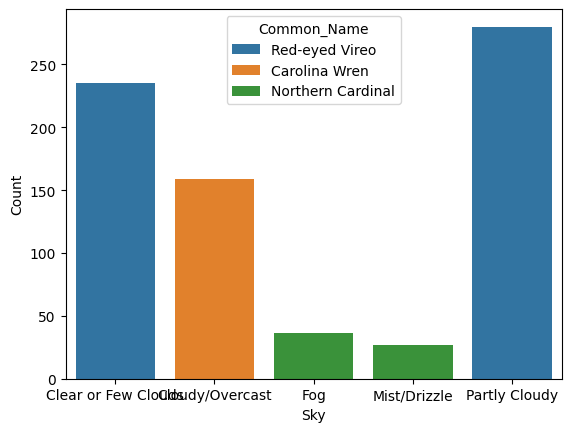

In [41]:
bird_count_by_sky = combined_df.groupby(["Sky", "Common_Name"]).size().reset_index(name="Count")
bird_count_by_sky_max = bird_count_by_sky.loc[bird_count_by_sky.groupby("Sky")["Count"].idxmax()]

# Find the bird with the maximum visits for each Sky

sns.barplot(data=bird_count_by_sky_max , x="Sky", y="Count", hue="Common_Name")